<a href="https://colab.research.google.com/github/SyedMohammedSameer/Finetune_VLM/blob/main/Qwen_Vision_finetuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Env setup



### Instatllations

In [2]:
!pip install "maestro[qwen_2_5_vl]==1.1.0rc2"

### GPU setup

In [9]:
!nvidia-smi

Wed Feb 26 03:24:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P0             71W /  400W |     635MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
#sudo kill -9 <>

In [5]:
import torch

# Clear GPU cache
torch.cuda.empty_cache()

In [11]:
import torch
torch.set_float32_matmul_precision("medium")  # or "high" for faster but slightly lower precision

## Fine-tuning

In [7]:
SYSTEM_MESSAGE = (
    "You are analyzing an image that may contain overlay text added by video or graphic editing. Your task is to extract only the overlay text that is deliberately overlaid on the image, avoiding any background noise such as interface text, headers, or form inputs. "
    + "Focus on text that appears visually distinct and is designed to grab attention, such as captions, titles, or promotional messages."
    + "Do not extract text embedded naturally in the background, on interfaces, or forms. "
    + "Preserve the text exactly as it appears, including capitalization, misspellings, and unusual characters. If no such overlay text exists in the image, return {none} "
    + "Focus on identifying Overlay text and ensuring the output adheres to the requested JSON structure. "
    + "Provide only the JSON output based on the extracted information. Avoid additional explanations or comments."
)

In [8]:
from maestro.trainer.models.qwen_2_5_vl.core import train

config = {
    "model_id": "Qwen/Qwen2.5-VL-3B-Instruct",
    "dataset": "/content/drive/MyDrive/Dataset",
    "system_message": SYSTEM_MESSAGE,
    "epochs": 5,
    "batch_size": 2,
    "num_workers": 10,
    "optimization_strategy": "qlora",
    "metrics": ["edit_distance", "bleu"],
}

train(config)

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

trainable params: 1,843,200 || all params: 3,756,466,176 || trainable%: 0.0491
[INFO] maestro - Dataset found locally at: /content/drive/MyDrive/Dataset
[INFO] maestro - Creating data loaders from '/content/drive/MyDrive/Dataset'...
[INFO] maestro - Detected JSONL dataset format.
[INFO] maestro - Found JSONL split 'train' at: /content/drive/MyDrive/Dataset/train/annotations.jsonl
[WARNING] maestro - Skipping line 456: image file not found '/content/drive/MyDrive/Dataset/train/train_00457.png+'
[WARNING] maestro - Skipping line 4696: image file not found '/content/drive/MyDrive/Dataset/train/ /content/drive/MyDrive/Dataset/train/train_04717.png '
[WARNING] maestro - Skipping line 4697: image file not found '/content/drive/MyDrive/Dataset/train/ /content/drive/MyDrive/Dataset/train/train_04718.png '
[WARNING] maestro - Skipping line 4698: image file not found '/content/drive/MyDrive/Dataset/train/ /content/drive/MyDrive/Dataset/train/train_04719.png '
[WARNING] maestro - Skipping line 46

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: `Trainer(limit_val_batches=1)` was configured so 1 batch will be used.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer(limit_val_batches=1)` was configured so 1 batch will be used.
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUD

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Saved latest checkpoint to /content/training/qwen_2_5_vl/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

Saved latest checkpoint to /content/training/qwen_2_5_vl/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

Saved latest checkpoint to /content/training/qwen_2_5_vl/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

Saved latest checkpoint to /content/training/qwen_2_5_vl/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

Saved latest checkpoint to /content/training/qwen_2_5_vl/1/checkpoints/latest


INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


## Examining Results

In [10]:
!ls -la /content/training/qwen_2_5_vl/1/metrics

total 92
drwxr-xr-x 2 root root  4096 Feb 26 03:24 .
drwxr-xr-x 4 root root  4096 Feb 26 03:24 ..
-rw-r--r-- 1 root root 20514 Feb 26 03:24 bleu_plot.png
-rw-r--r-- 1 root root 31479 Feb 26 03:24 edit_distance_plot.png
-rw-r--r-- 1 root root 28358 Feb 26 03:24 loss_plot.png


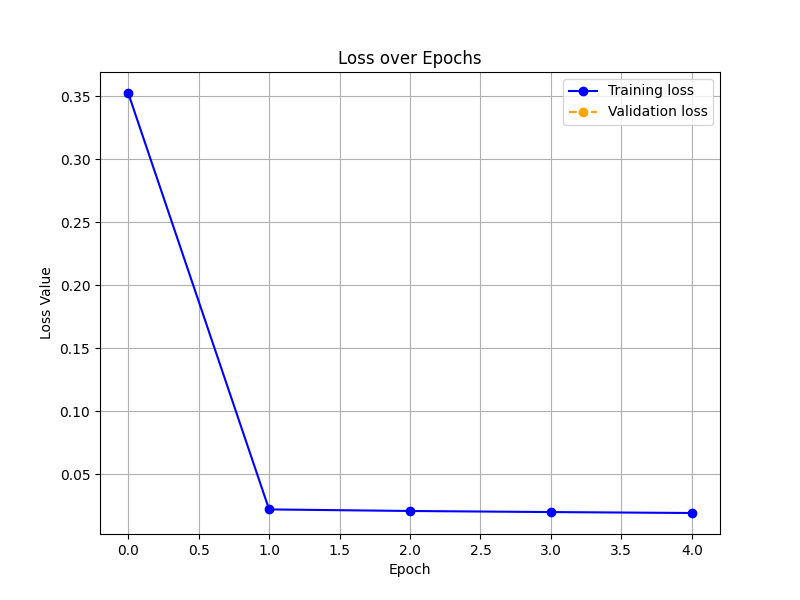

In [11]:
from IPython.display import Image

Image(filename="/content/training/qwen_2_5_vl/1/metrics/loss_plot.png", height=600)

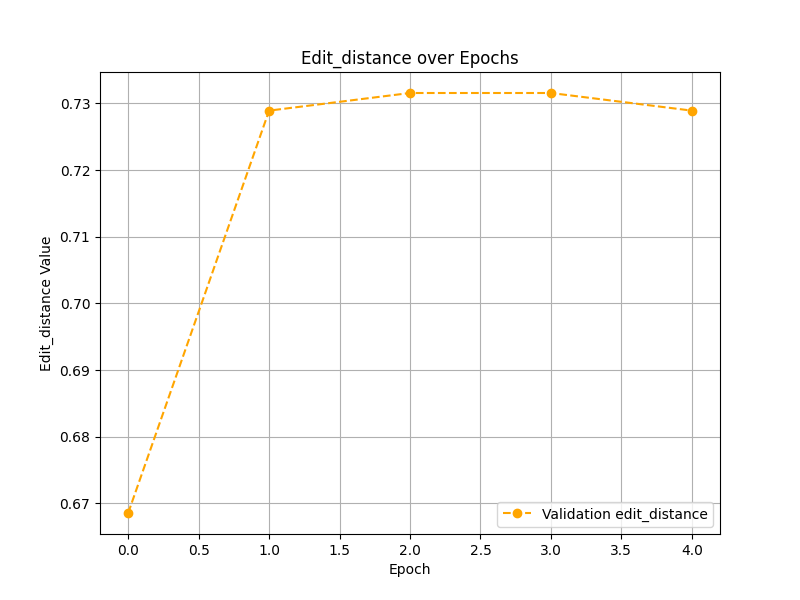

In [12]:
from IPython.display import Image

Image(filename="/content/training/qwen_2_5_vl/1/metrics/edit_distance_plot.png", height=600)

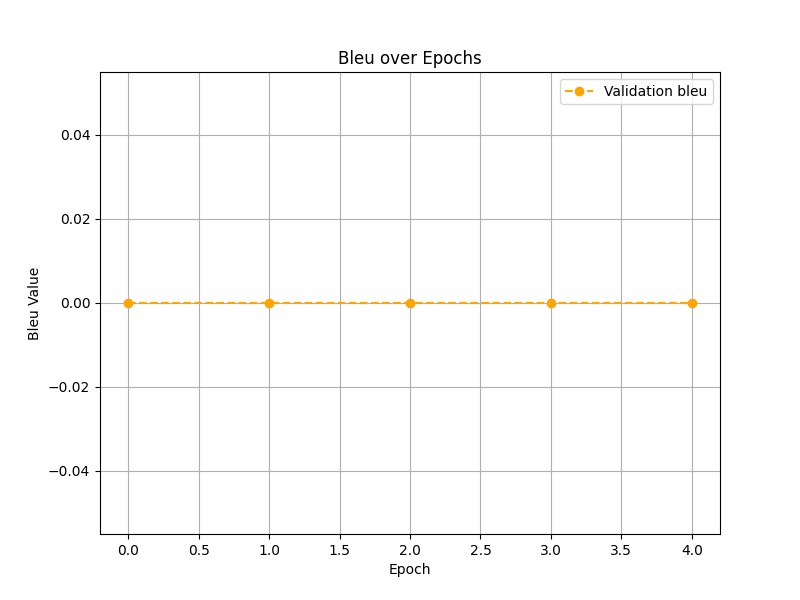

In [13]:
from IPython.display import Image

Image(filename="/content/training/qwen_2_5_vl/1/metrics/bleu_plot.png", height=600)

In [14]:
from maestro.trainer.models.qwen_2_5_vl.checkpoints import OptimizationStrategy, load_model

processor, model = load_model(
    model_id_or_path="/content/training/qwen_2_5_vl/1/checkpoints/latest",
    optimization_strategy=OptimizationStrategy.NONE,
)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
from maestro.trainer.common.datasets.jsonl import JSONLDataset

ds = JSONLDataset(
    annotations_path=f"/content/drive/MyDrive/Dataset/test/annotations.jsonl",
    images_directory_path=f"/content/drive/MyDrive/Dataset/test",
)

image, entry = ds[0]

[INFO] maestro - Loaded 722 valid entries out of 722 from '/content/drive/MyDrive/Dataset/test/annotations.jsonl'. Skipped 0.


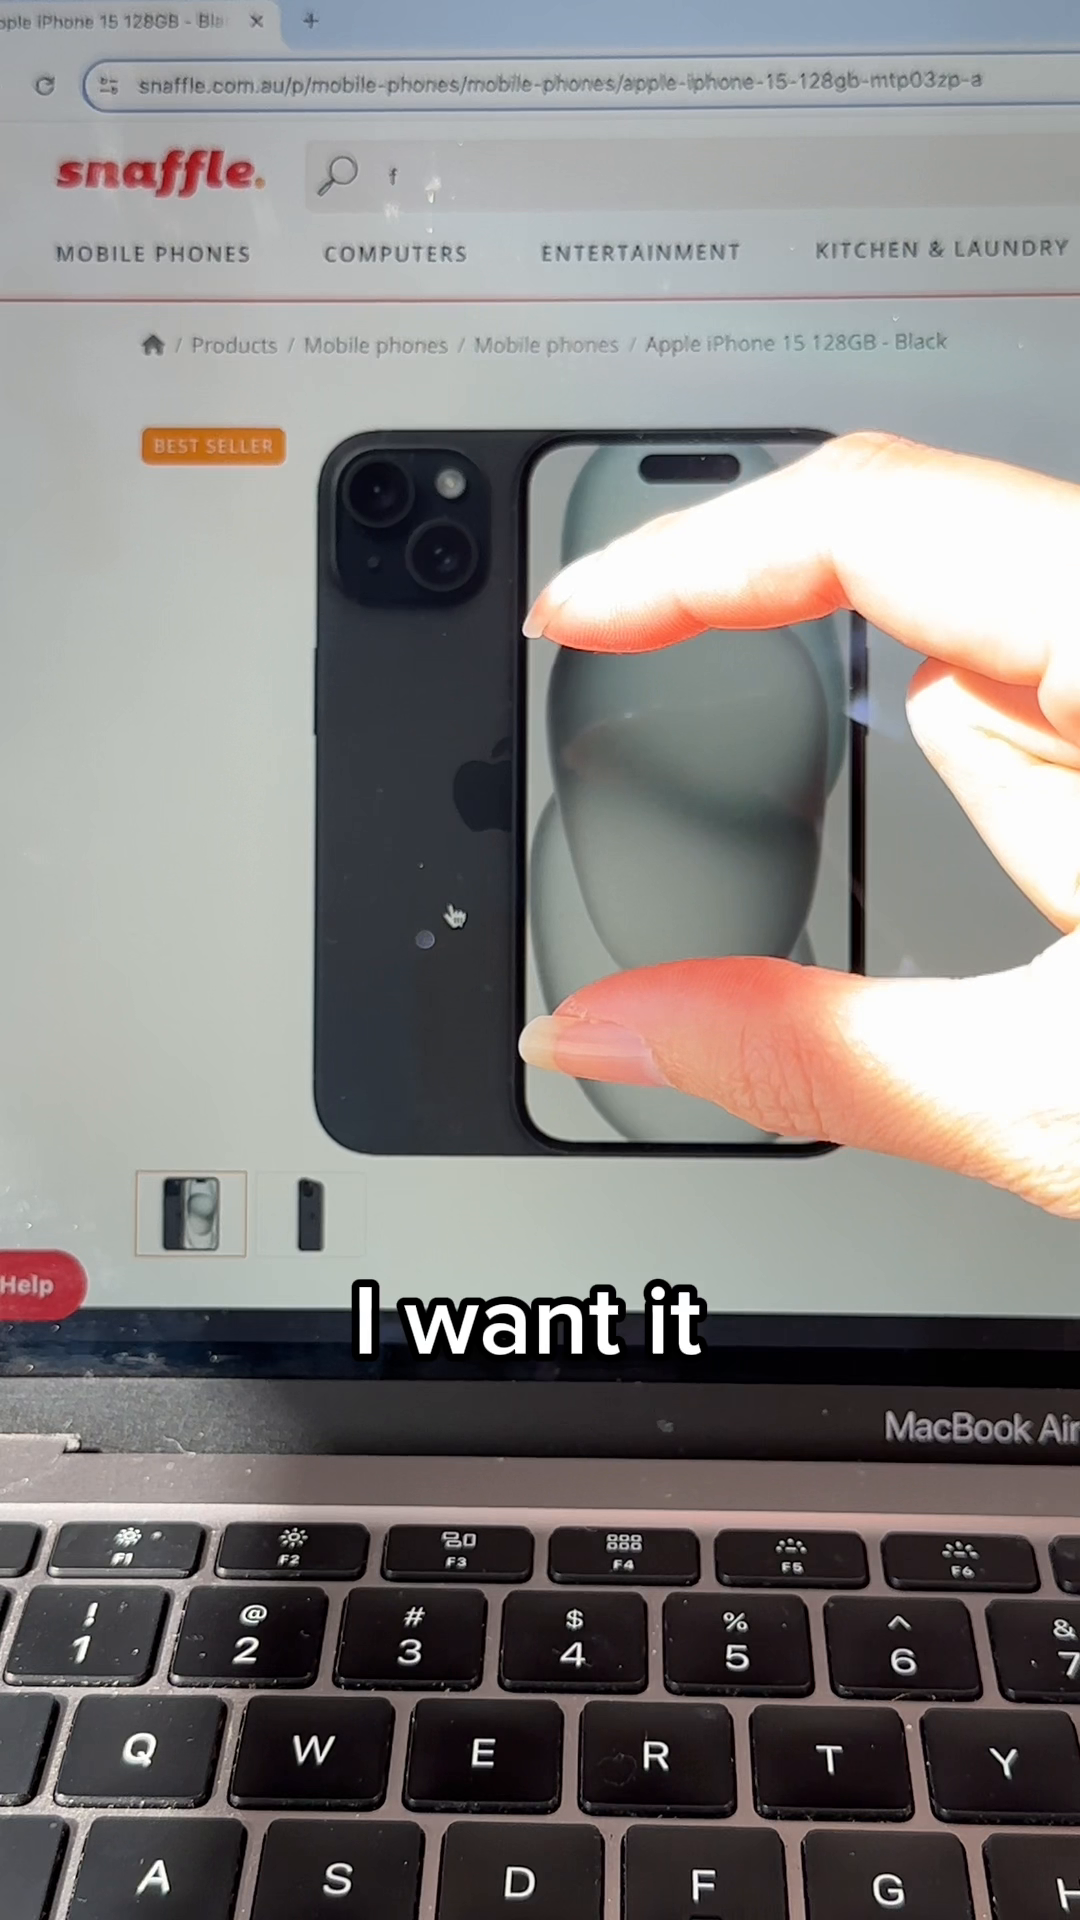

In [17]:
image

In [19]:
import json

from maestro.trainer.models.qwen_2_5_vl.inference import predict

generated_suffix = predict(
    model=model, processor=processor, image=image, prefix=entry["prefix"], system_message=SYSTEM_MESSAGE
)
generated_suffix

'I want it'

## Saving the Finetuned model

### Installations

In [20]:
!pip install transformers huggingface_hub

### Login and Upload

In [21]:
from huggingface_hub import notebook_login

notebook_login()

In [22]:
from maestro.trainer.models.qwen_2_5_vl.checkpoints import OptimizationStrategy, load_model
from transformers import AutoProcessor, AutoModelForVision2Seq

# Load your fine-tuned model
processor, model = load_model(
    model_id_or_path="/content/training/qwen_2_5_vl/1/checkpoints/latest",
    optimization_strategy=OptimizationStrategy.NONE,
)

# Define a local directory to save the model temporarily
output_dir = "/content/my_finetuned_qwen2_5_vl"

# Save the processor and model
processor.save_pretrained(output_dir)
model.save_pretrained(output_dir)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
from huggingface_hub import upload_folder

# Upload the folder to Hugging Face Hub
upload_folder(
    folder_path=output_dir,
    repo_id="MohammedSameerSyed/FinetunedQWEN",
    repo_type="model",
    create_pr=False  # Set to True if you want to create a pull request instead
)

adapter_model.safetensors:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/MohammedSameerSyed/FinetunedQWEN/commit/310941acf389b5604c808d97c24929716ab69c95', commit_message='Upload folder using huggingface_hub', commit_description='', oid='310941acf389b5604c808d97c24929716ab69c95', pr_url=None, repo_url=RepoUrl('https://huggingface.co/MohammedSameerSyed/FinetunedQWEN', endpoint='https://huggingface.co', repo_type='model', repo_id='MohammedSameerSyed/FinetunedQWEN'), pr_revision=None, pr_num=None)

In [24]:
from transformers import AutoProcessor, AutoModelForVision2Seq

processor = AutoProcessor.from_pretrained("MohammedSameerSyed/FinetunedQWEN")
model = AutoModelForVision2Seq.from_pretrained("MohammedSameerSyed/FinetunedQWEN")

preprocessor_config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

In [25]:
from google.colab import files
import shutil

shutil.make_archive("my_finetuned_qwen", "zip", output_dir)
files.download("my_finetuned_qwen.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>